/content/qgcl_proposed_roc_data.csv
/content/qgcl_1_roc_curve_data.csv
/content/qgcl_2_roc_curve_data.csv
/content/qgcl_3_roc_curve_data.csv
/content/QHCL_fpr_tpr.csv
/content/QCL_fpr_tpr.csv
/content/eqgnn_roc_data.csv
/content/egnn_roc_data.csv
/content/qgnn_roc_data.csv
/content/gnn_roc_data.csv


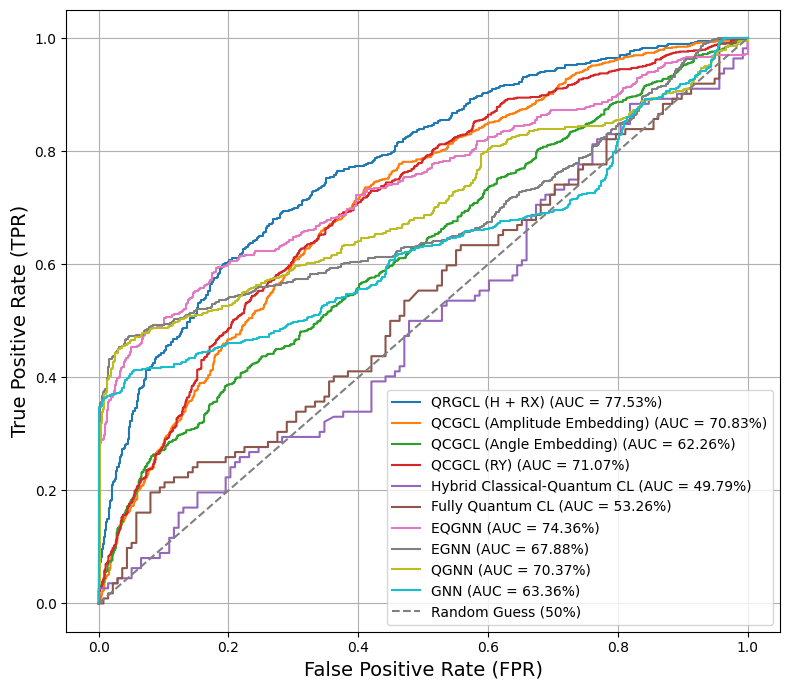

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths and model names, including AUC scores for specific models
files_and_models = {
    '/content/qgcl_proposed_roc_data.csv': 'QRGCL (H + RX)',
    '/content/qgcl_1_roc_curve_data.csv': 'QCGCL (Amplitude Embedding)',
    '/content/qgcl_2_roc_curve_data.csv': 'QCGCL (Angle Embedding)',
    '/content/qgcl_3_roc_curve_data.csv': 'QCGCL (RY)',
    '/content/QHCL_fpr_tpr.csv': 'Hybrid Classical-Quantum CL',
    '/content/QCL_fpr_tpr.csv': 'Fully Quantum CL',
    '/content/eqgnn_roc_data.csv': 'EQGNN',
    '/content/egnn_roc_data.csv': 'EGNN',
    '/content/qgnn_roc_data.csv': 'QGNN',
    '/content/gnn_roc_data.csv': 'GNN',
}

# Pre-known AUC scores for specific models
preknown_auc = {
    'QCGCL (Amplitude Embedding)': 70.83,
    'QCGCL (Angle Embedding)': 62.26,
    'QCGCL (RY)': 71.07,
}

# Function to compute AUC using the trapezoidal rule
def calculate_auc(fpr, tpr):
    """
    Calculate AUC using the trapezoidal rule.

    Parameters:
    - fpr: A list or array-like of false positive rates.
    - tpr: A list or array-like of true positive rates.

    Returns:
    - auc_score: The computed AUC score.
    """
    # Ensure fpr and tpr are numpy arrays for easier manipulation
    fpr = np.array(fpr)
    tpr = np.array(tpr)

    # Compute AUC using the trapezoidal rule: AUC = sum((x2 - x1) * (y1 + y2) / 2)
    auc_score = np.trapz(tpr, fpr)
    return auc_score * 100  # Convert to percentage

# Initialize the plot
plt.figure(figsize=(8, 7))

# Iterate over the file paths and model names
for file_path, model_name in files_and_models.items():
    # Read each CSV file
    df = pd.read_csv(file_path)
    print(file_path)
    # Extract the first two columns as FPR and TPR
    fpr, tpr = df.iloc[:, 0], df.iloc[:, 1]

    # Determine the AUC score
    if model_name in preknown_auc:
        # Use the pre-known AUC score for annotation
        auc_score = preknown_auc[model_name]
    else:
        # Calculate AUC using the trapezoidal rule
        auc_score = calculate_auc(fpr, tpr)

    # Plot the ROC curve for each model with the AUC score in the legend
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f}%)")

# Add the threshold midline (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (50%)')


# Add labels, title, and legend
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
# plt.title('ROC Curves for Different Models', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#### Quantum circuit

In [1]:
!pip install pennylane qiskit pennylane-qiskit pylatexenc  ## new version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [2]:
import pennylane as qml
from pennylane import numpy as np
import qiskit
print(qml.__version__)
print(qiskit.__version__)
import pennylane_qiskit
print(pennylane_qiskit.__version__)

0.38.0
1.2.4
0.38.1


In [7]:
# !pip install qiskit qiskit_machine_learning
# from qiskit import BasicAer
# from qiskit.utils import QuantumInstance, algorithm_globals
# from qiskit.algorithms.optimizers import COBYLA
# from qiskit.circuit.library import TwoLocal
# from qiskit_machine_learning.algorithms import VQC, QSVC
# from qiskit_machine_learning.circuit.library import RawFeatureVector
# from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap, NLocal
# from qiskit import QuantumCircuit
# from qiskit.circuit import Parameter   ANSATZ
# from qiskit_machine_learning.kernels import QuantumKernel

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, pairwise_distances, silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE

# classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from time import time
from datetime import datetime
import matplotlib.cm as cm
from scipy.spatial.distance import cdist

from datetime import datetime
from joblib import Parallel, delayed

import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
nodes_per_graph = 7
# Define the quantum device using Qiskit Aer simulator backend
dev = qml.device("qiskit.aer", wires=nodes_per_graph)
import torch

class BetterBetterPennyLaneLayer(torch.nn.Module):
    def __init__(self, nodes_per_graph, num_layers, input_dim, device, entanglement_type='SWAP', encoding_type='RY'):
        super(BetterBetterPennyLaneLayer, self).__init__()
        self.device = device
        self.num_qubits = nodes_per_graph
        self.entanglement_type = entanglement_type
        self.encoding_type = encoding_type

        self.num_layers = num_layers
        self.input_dim = input_dim

        # Define the QNode for applying the quantum circuit
        self.qnode = qml.QNode(self.quantum_circuit, dev, interface="torch")

    def quantum_circuit(self, inputs, weights):
        # Encoding the input features using the selected encoding method
        if self.encoding_type == 'Amplitude':
            # Amplitude Embedding (requires input size to be a power of 2 and normalized)
            qml.AmplitudeEmbedding(features=inputs, wires=range(self.num_qubits), normalize=True, pad_with=False)

        elif self.encoding_type == 'IQP':
            # IQP Embedding
            qml.IQPEmbedding(features=inputs, wires=range(self.num_qubits), n_repeats=2)

        elif self.encoding_type == 'Displacement':
            # Displacement Embedding (for continuous-variable quantum circuits)
            qml.DisplacementEmbedding(features=inputs, wires=range(self.num_qubits), method="amplitude")

        else:
            # Encoding with rotation gates
            for q in range(self.num_qubits):
                if self.encoding_type == 'RY':
                    qml.RY(inputs[q], wires=q)
                elif self.encoding_type == 'RZ':
                    qml.RZ(inputs[q], wires=q)
                elif self.encoding_type == 'RX':
                    qml.RX(inputs[q], wires=q)
                elif self.encoding_type == 'H':
                    qml.Hadamard(wires=q)
                elif self.encoding_type == 'Phase':
                    qml.PhaseShift(inputs[q], wires=q)

                qml.RX(inputs[q], wires=q)

        for q in range(self.num_qubits):
            for e in range(q + 1, self.num_qubits):
                qml.CRZ(inputs[q], wires=[q, e])

        # Apply quantum layers
        weight_idx = 0
        for l in range(self.num_layers):
            for q in range(self.num_qubits):
                # Apply rotation gates with trainable parameters (weights)
                qml.RX(weights[weight_idx], wires=q)
                qml.RY(weights[weight_idx + 1], wires=q)
                qml.RZ(weights[weight_idx + 2], wires=q)
                weight_idx += 3

            # Apply entanglement based on the selected type
            if self.entanglement_type == 'CNOT':
                for q in range(self.num_qubits - 1):
                    qml.CNOT(wires=[q, q + 1])
            elif self.entanglement_type == 'CZ':
                for q in range(self.num_qubits - 1):
                    qml.CZ(wires=[q, q + 1])
            elif self.entanglement_type == 'SWAP':
                for q in range(self.num_qubits - 1):
                    qml.SWAP(wires=[q, q + 1])

        # Measure the expectation value of the PauliZ operator for each qubit
        return [qml.expval(qml.PauliZ(q)) for q in range(self.num_qubits)]

    def forward(self, inputs):
        # Randomly initialize weights for the quantum circuit
        weights = torch.rand(self.num_layers * 3 * self.num_qubits, requires_grad=True)

        # Compute the quantum circuit
        return self.qnode(inputs, weights)

# Instantiate the quantum model
pl_model = BetterBetterPennyLaneLayer(nodes_per_graph, num_layers=3, input_dim = 8, device='cpu', entanglement_type='SWAP', encoding_type='H')

# Example input for the quantum circuit (random inputs)
inputs = torch.rand(nodes_per_graph)

# Forward pass through the model
# output = pl_model(inputs)

pl_model(inputs)
# # Extract the Qiskit circuit from the PennyLane QNode
# qiskit_circuit = load(pl_model.qnode)


[tensor(0.6191, dtype=torch.float64, grad_fn=<ExecuteTapesBackward>),
 tensor(0.1699, dtype=torch.float64, grad_fn=<ExecuteTapesBackward>),
 tensor(0.7500, dtype=torch.float64, grad_fn=<ExecuteTapesBackward>),
 tensor(0.7441, dtype=torch.float64, grad_fn=<ExecuteTapesBackward>),
 tensor(-0.6367, dtype=torch.float64, grad_fn=<ExecuteTapesBackward>),
 tensor(-0.2148, dtype=torch.float64, grad_fn=<ExecuteTapesBackward>),
 tensor(0.1348, dtype=torch.float64, grad_fn=<ExecuteTapesBackward>)]

In [4]:
drawer = qml.draw(pl_model.qnode)
print(drawer(inputs, torch.rand(pl_model.num_layers * 3 * pl_model.num_qubits)))

0: ──H──RX(0.01)─╭●────────╭●────────╭●────────╭●────────╭●────────╭●─────────RX(0.49)──RY(0.83)
1: ──H──RX(0.26)─╰RZ(0.01)─│─────────│─────────│─────────│─────────│─────────╭●────────╭●───────
2: ──H──RX(0.73)───────────╰RZ(0.01)─│─────────│─────────│─────────│─────────╰RZ(0.26)─│────────
3: ──H──RX(0.64)─────────────────────╰RZ(0.01)─│─────────│─────────│───────────────────╰RZ(0.26)
4: ──H──RX(0.24)───────────────────────────────╰RZ(0.01)─│─────────│────────────────────────────
5: ──H──RX(0.77)─────────────────────────────────────────╰RZ(0.01)─│────────────────────────────
6: ──H──RX(0.15)───────────────────────────────────────────────────╰RZ(0.01)────────────────────

───RZ(0.47)───────────────────────────────────────────────────╭SWAP──────RX(1.00)──RY(0.12)
──╭●────────╭●────────╭●─────────RX(0.18)──RY(0.52)──RZ(0.77)─╰SWAP────────────────────────
──│─────────│─────────│─────────╭●────────╭●────────╭●────────╭●─────────RX(0.96)──RY(0.56)
──│─────────│─────────│─────────╰RZ(0.73)─│─

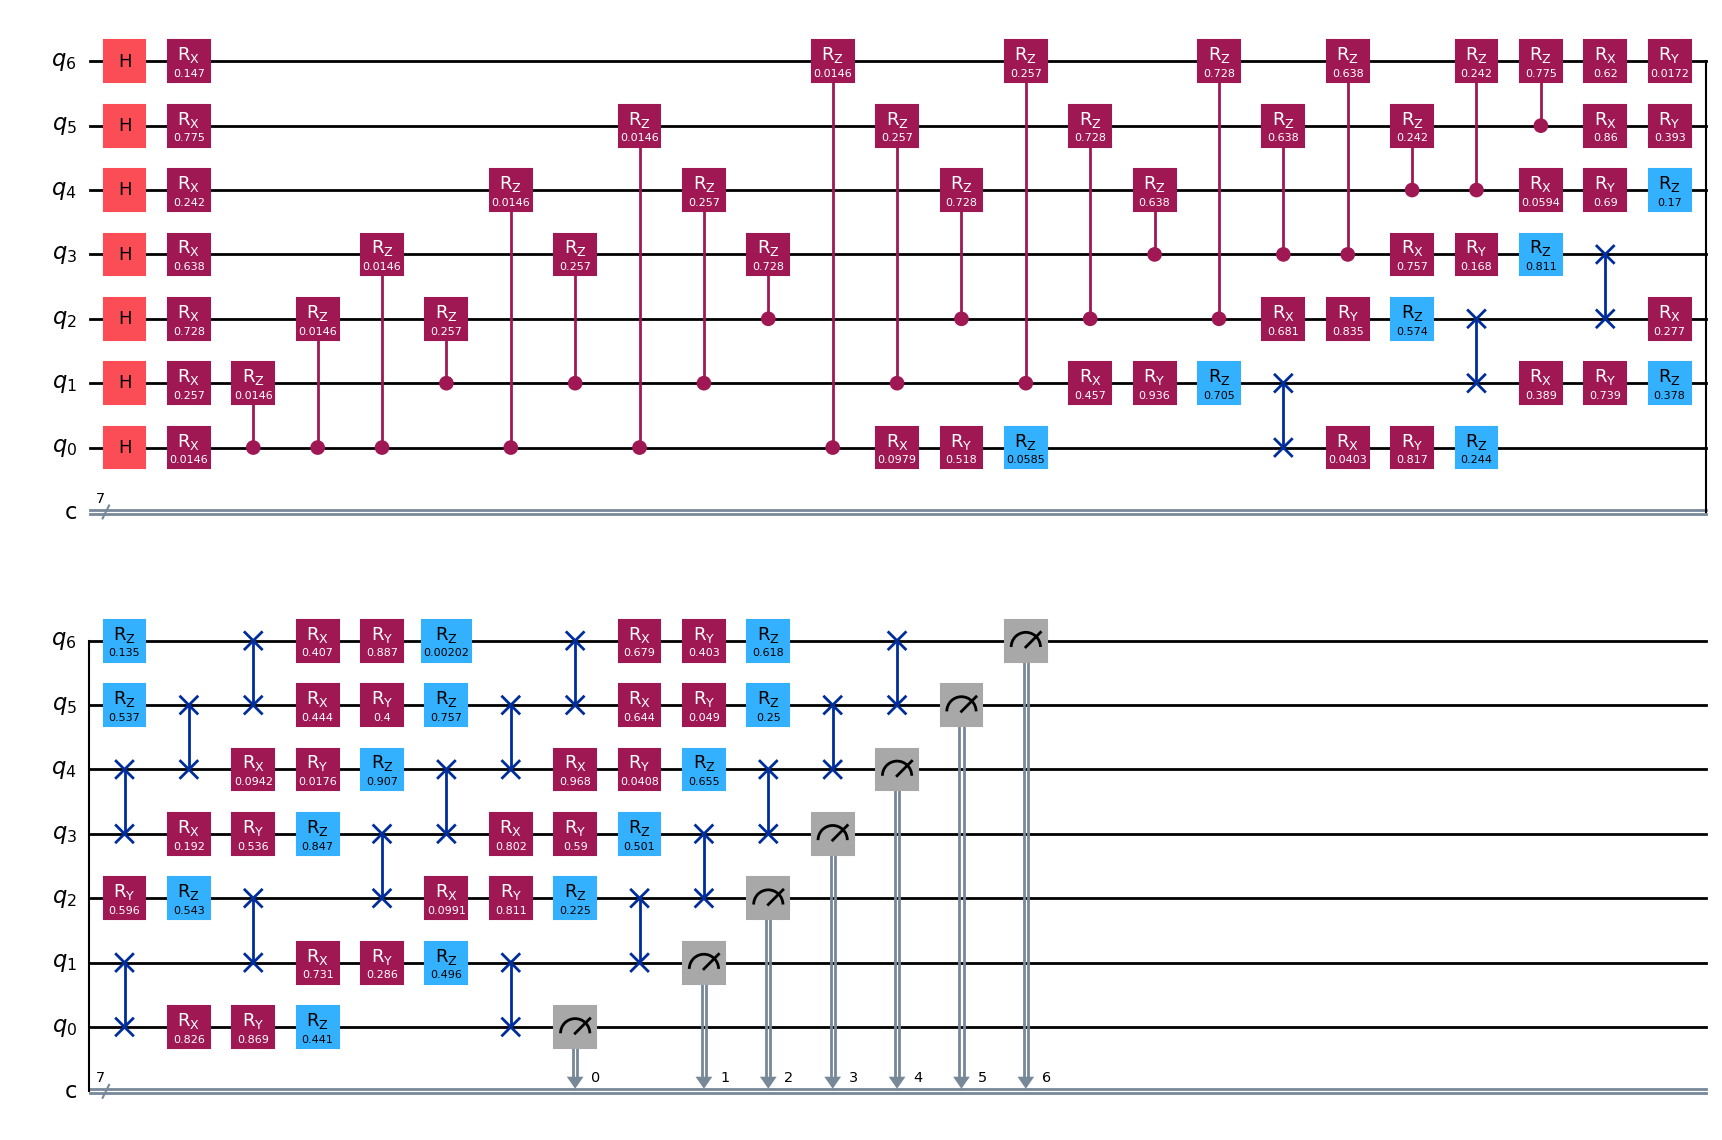

In [5]:
dev._circuit.draw('mpl',
                  plot_barriers=True,
                  reverse_bits=True,
                  style = 'iqp',       # 'iqp-dark', 'clifford',
                  idle_wires=True,
                  vertical_compression='high',
                  # fold=-1,
                  )

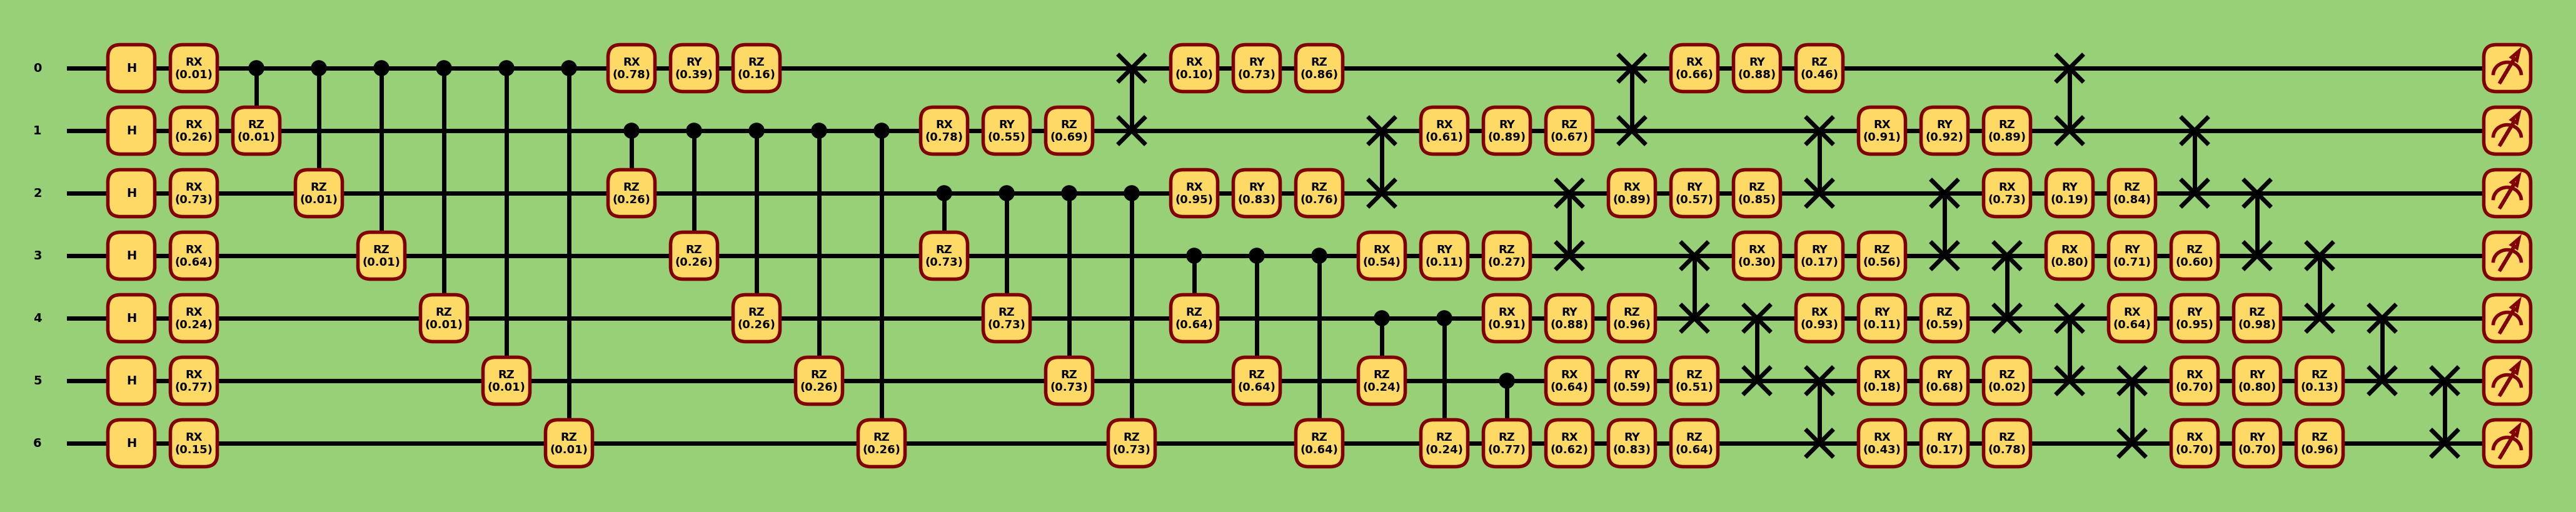

In [14]:

fig, ax = qml.draw_mpl(pl_model.qnode,
                       decimals=2,
                       style="rcParams",
                       expansion_strategy="gradient",
                       #level = "top", # "user", "top", None, slice(1,2)
                       show_all_wires=True)(inputs, torch.rand(pl_model.num_layers * 3 * pl_model.num_qubits))
plt.rcParams['patch.facecolor'] = 'FFD966'
plt.rcParams['patch.edgecolor'] = 'maroon'
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['patch.linewidth'] = 4
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['lines.color'] = 'black'
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['figure.facecolor'] = '97D077'
fig.show()